#### 11/12/2021

## Introduction

This is a bike-share analysis case study on how annual members and casual riders differ In order to design marketing strategies aimed at converting casual riders into annual members.

## Data description

This data is part of historical trip data of the City of Chicago’s City Divvy bicycle-sharing service which is operated by Motivate International Inc., As part of the commitment between them, the City permits Motivate to make certain Divvy system data available to the public.

The trip data is in the link below:
<https://divvy-tripdata.s3.amazonaws.com/index.html>

Data License Agreement is included in this link :
<https://www.divvybikes.com/data-license-agreement>

The data is used to explore how different customer types are using bikes and it is consisted of 12 CSV files of 12-month data starting from October 2020 till September 2021, each file represents a whole month of bicycle trip data. 

Each file contains 13 columns, most of them are qualitative including ride id, type of bikes, start and end station names, start and end station id, start and end latitude and longitude of each ride and if the rider is a member or casual, Also it contains quantitative data represented by the start and the end time of each ride, After merging the 12 files into one file representing a year of bicycle trip data, The number of rows reaches 5,135,803 rows.

Overall this data is reliable, Comprehensive which contains all the information needed for analysis, it contains no duplicates despite its huge number of rows, But this data contains some missing values related to station information, But it does not include any missing values in the ride id column, So, it does not affect the analysis at all.

## Set up the environment

In [1]:
# Setting up the environment by loading the following libraries

library(tidyverse)
library(janitor)
library(lubridate)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Import our data

In [2]:
# Import our data

D2021_09 = read_csv("/kaggle/input/divvy-bicycle-sharing-trip-data/202109-divvy-tripdata.csv")
D2021_08 = read_csv("/kaggle/input/divvy-bicycle-sharing-trip-data/202108-divvy-tripdata.csv")
D2021_07 = read_csv("/kaggle/input/divvy-bicycle-sharing-trip-data/202107-divvy-tripdata.csv")
D2021_06 = read_csv("/kaggle/input/divvy-bicycle-sharing-trip-data/202106-divvy-tripdata.csv")
D2021_05 = read_csv("/kaggle/input/divvy-bicycle-sharing-trip-data/202105-divvy-tripdata.csv")
D2021_04 = read_csv("/kaggle/input/divvy-bicycle-sharing-trip-data/202104-divvy-tripdata.csv")
D2021_03 = read_csv("/kaggle/input/divvy-bicycle-sharing-trip-data/202103-divvy-tripdata.csv")
D2021_02 = read_csv("/kaggle/input/divvy-bicycle-sharing-trip-data/202102-divvy-tripdata.csv")
D2021_01 = read_csv("/kaggle/input/divvy-bicycle-sharing-trip-data/202101-divvy-tripdata.csv")
D2020_12 = read_csv("/kaggle/input/divvy-bicycle-sharing-trip-data/202012-divvy-tripdata.csv")
D2020_11 = read_csv("/kaggle/input/divvy-bicycle-sharing-trip-data/202011-divvy-tripdata.csv")
D2020_10 = read_csv("/kaggle/input/divvy-bicycle-sharing-trip-data/202010-divvy-tripdata.csv")

Rows: 756147 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 804352 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 822410 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","


## Cleaning and processing data

First, before merging the 12 months together, It is better to search for duplicates in the 12 files separately, After that we can merge them into one file containing one-year data. After that, we can create a column called "ride_length" by subtracting the column "started_at" from the column "ended_at". Then, create another column called "day" and calculate the days of the week. And create another one called "year_month" by calculating the month of each ride. After that we sort the data by date of each ride, And then, Excluding all the negative and zero ride length trips.

In [3]:
# Searching for duplicates

get_dupes(D2021_09, ride_id)
get_dupes(D2021_08, ride_id)
get_dupes(D2021_07, ride_id)
get_dupes(D2021_06, ride_id)
get_dupes(D2021_05, ride_id)
get_dupes(D2021_04, ride_id)
get_dupes(D2021_03, ride_id)
get_dupes(D2021_01, ride_id)
get_dupes(D2021_02, ride_id)
get_dupes(D2020_12, ride_id)
get_dupes(D2020_11, ride_id)
get_dupes(D2020_10, ride_id)

# Merging into one dataset

processed_data <- rbind(D2021_09, D2021_08, D2021_07,D2021_06,D2021_05,D2021_04,D2021_03,D2021_02,D2021_01,D2020_12,D2020_11,D2020_10)

# Cleaning names

processed_data <- clean_names(processed_data)

#adding column ride_length to the dataset

processed_data$ride_length <- (processed_data$ended_at - processed_data$started_at)

#adding column day to the dataset

processed_data$day <- wday(ymd_hms(processed_data$started_at), label = TRUE) 

#adding column year_month to the dataset

processed_data<-cbind(processed_data,month=month(ymd_hms(processed_data$started_at), label = FALSE)) 
processed_data<-cbind(processed_data,year=year(ymd_hms(processed_data$started_at))) 
processed_data<-unite(processed_data,year_month,'year','month',sep = '_')

#sorting dates
processed_data <- processed_data %>% arrange(desc(started_at)) 

#exclude negative and zero ride_length ride
processed_data <- processed_data[!(processed_data$ride_length <=0) ,] 

No duplicate combinations found of: ride_id



ride_id,dupe_count,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<int>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


No duplicate combinations found of: ride_id



ride_id,dupe_count,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<int>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


No duplicate combinations found of: ride_id



ride_id,dupe_count,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<int>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


No duplicate combinations found of: ride_id



ride_id,dupe_count,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<int>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


No duplicate combinations found of: ride_id



ride_id,dupe_count,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<int>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


No duplicate combinations found of: ride_id



ride_id,dupe_count,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<int>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


No duplicate combinations found of: ride_id



ride_id,dupe_count,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<int>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


No duplicate combinations found of: ride_id



ride_id,dupe_count,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<int>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


No duplicate combinations found of: ride_id



ride_id,dupe_count,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<int>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


No duplicate combinations found of: ride_id



ride_id,dupe_count,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<int>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


No duplicate combinations found of: ride_id



ride_id,dupe_count,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<int>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


No duplicate combinations found of: ride_id



ride_id,dupe_count,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<int>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


## Analysis

The next statistics and pie chart shows the different rideable types of bikes.

member_casual,classic_bike,docked_bike,electric_bike,total,percentage
<chr>,<int>,<int>,<int>,<int>,<dbl>
casual,1120605,407077,829573,2357255,45.92802
member,1629988,267840,877416,2775244,54.07198


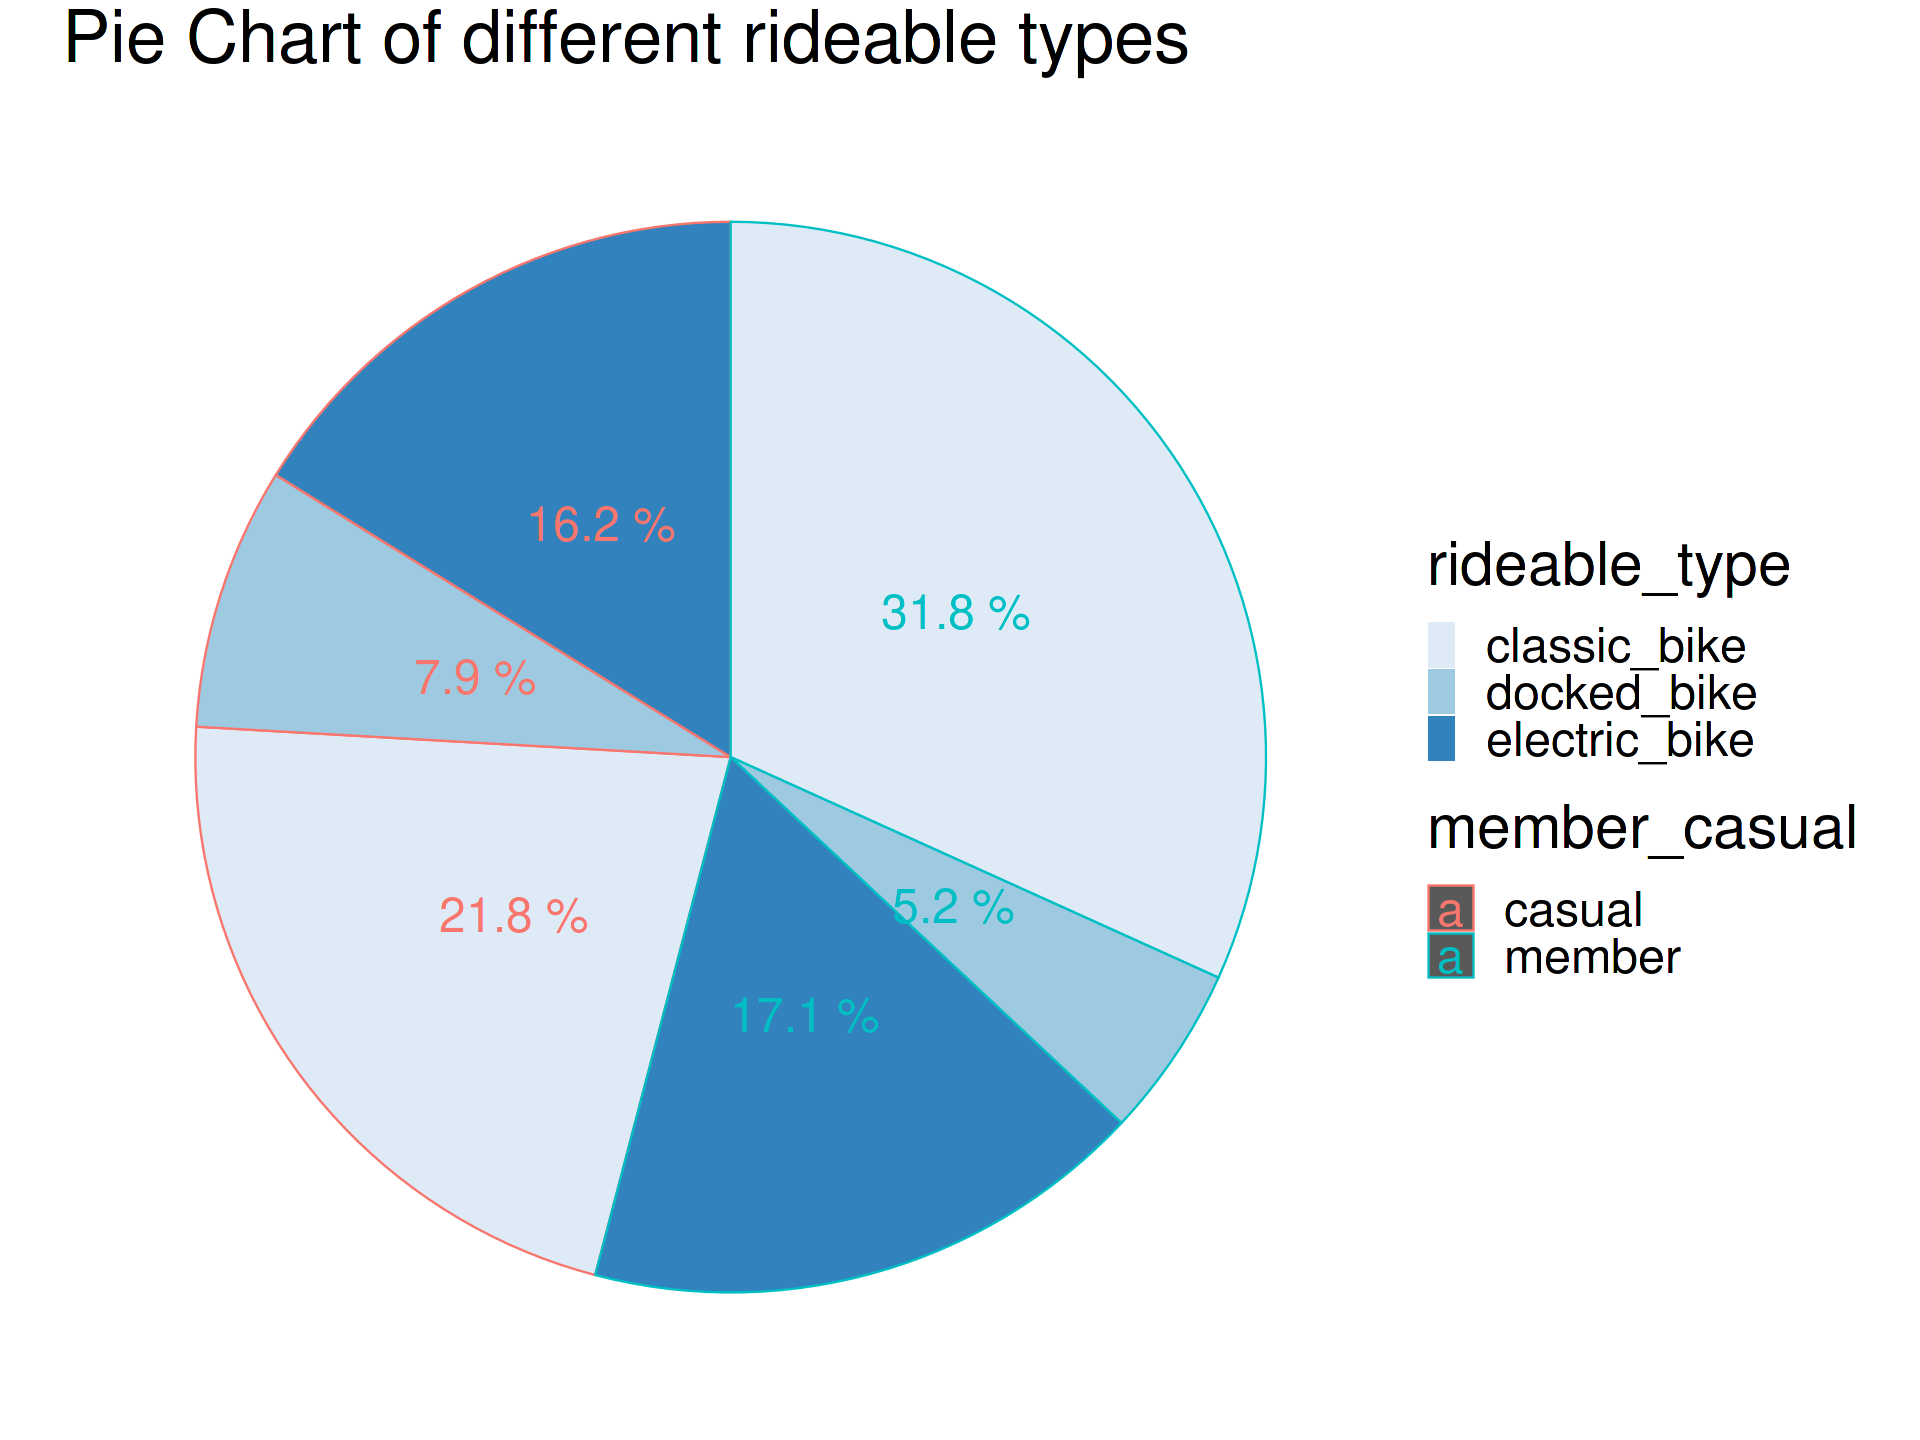

In [4]:
# rideable type statistics

rideable_type_piechart<-processed_data %>% group_by(member_casual,rideable_type) %>% count(rideable_type) %>% rename(count=n)

rideable_type_piechart_statistics <- cbind(rideable_type_piechart %>% pivot_wider(names_from = rideable_type, values_from = count),
                                           total=c(sum(rideable_type_piechart[rideable_type_piechart$member_casual == "casual",][, 'count']),
                                                   sum(rideable_type_piechart[rideable_type_piechart$member_casual == "member",][, 'count'])),
                                                   percentage=c(100*mean(processed_data$member_casual=='casual'),
                                                   100*mean(processed_data$member_casual=='member')))

rideable_type_piechart_statistics

# Pie Chart of different rideable types

options(repr.plot.width = 16, repr.plot.height = 12)

ggplot(rideable_type_piechart,
       aes(x = "", y = count, group = member_casual, fill=rideable_type, color=member_casual)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta="y")+
  theme_classic() +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title.y=element_blank(),
        axis.title.x=element_blank(),
        panel.grid  = element_blank(),
        axis.line = element_blank())+
  geom_text(aes(label = paste(round(count / sum(count) * 100, 1), "%")),

            position = position_stack(vjust = 0.5), size=10)+
  scale_fill_brewer(palette="Blues")+
  labs(title = "Pie Chart of different rideable types")+
  theme(text = element_text(size = 36), element_line(size = 1.6))




As you can see the casual riders form 45.9% of the riders, And it is obvious from the pie chart that most riders either casual or member users classic bikes.

Let's take a look at the number of rides by days of the week.

member_casual,rideable_type,Sun,Mon,Tue,Wed,Thu,Fri,Sat,sat_sun_percentage
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
casual,classic_bike,226797,122689,111564,116967,124701,155252,262635,43.67569
casual,docked_bike,84705,43981,38626,38392,40465,56853,104055,46.36961
casual,electric_bike,133397,99724,101259,101802,109449,127006,156936,34.99788
member,classic_bike,211848,223178,239511,249539,241661,229351,234900,27.40805
member,docked_bike,29759,34621,37502,40481,43156,41082,41239,26.50762
member,electric_bike,103426,117862,129619,132519,135471,134798,123721,25.88818


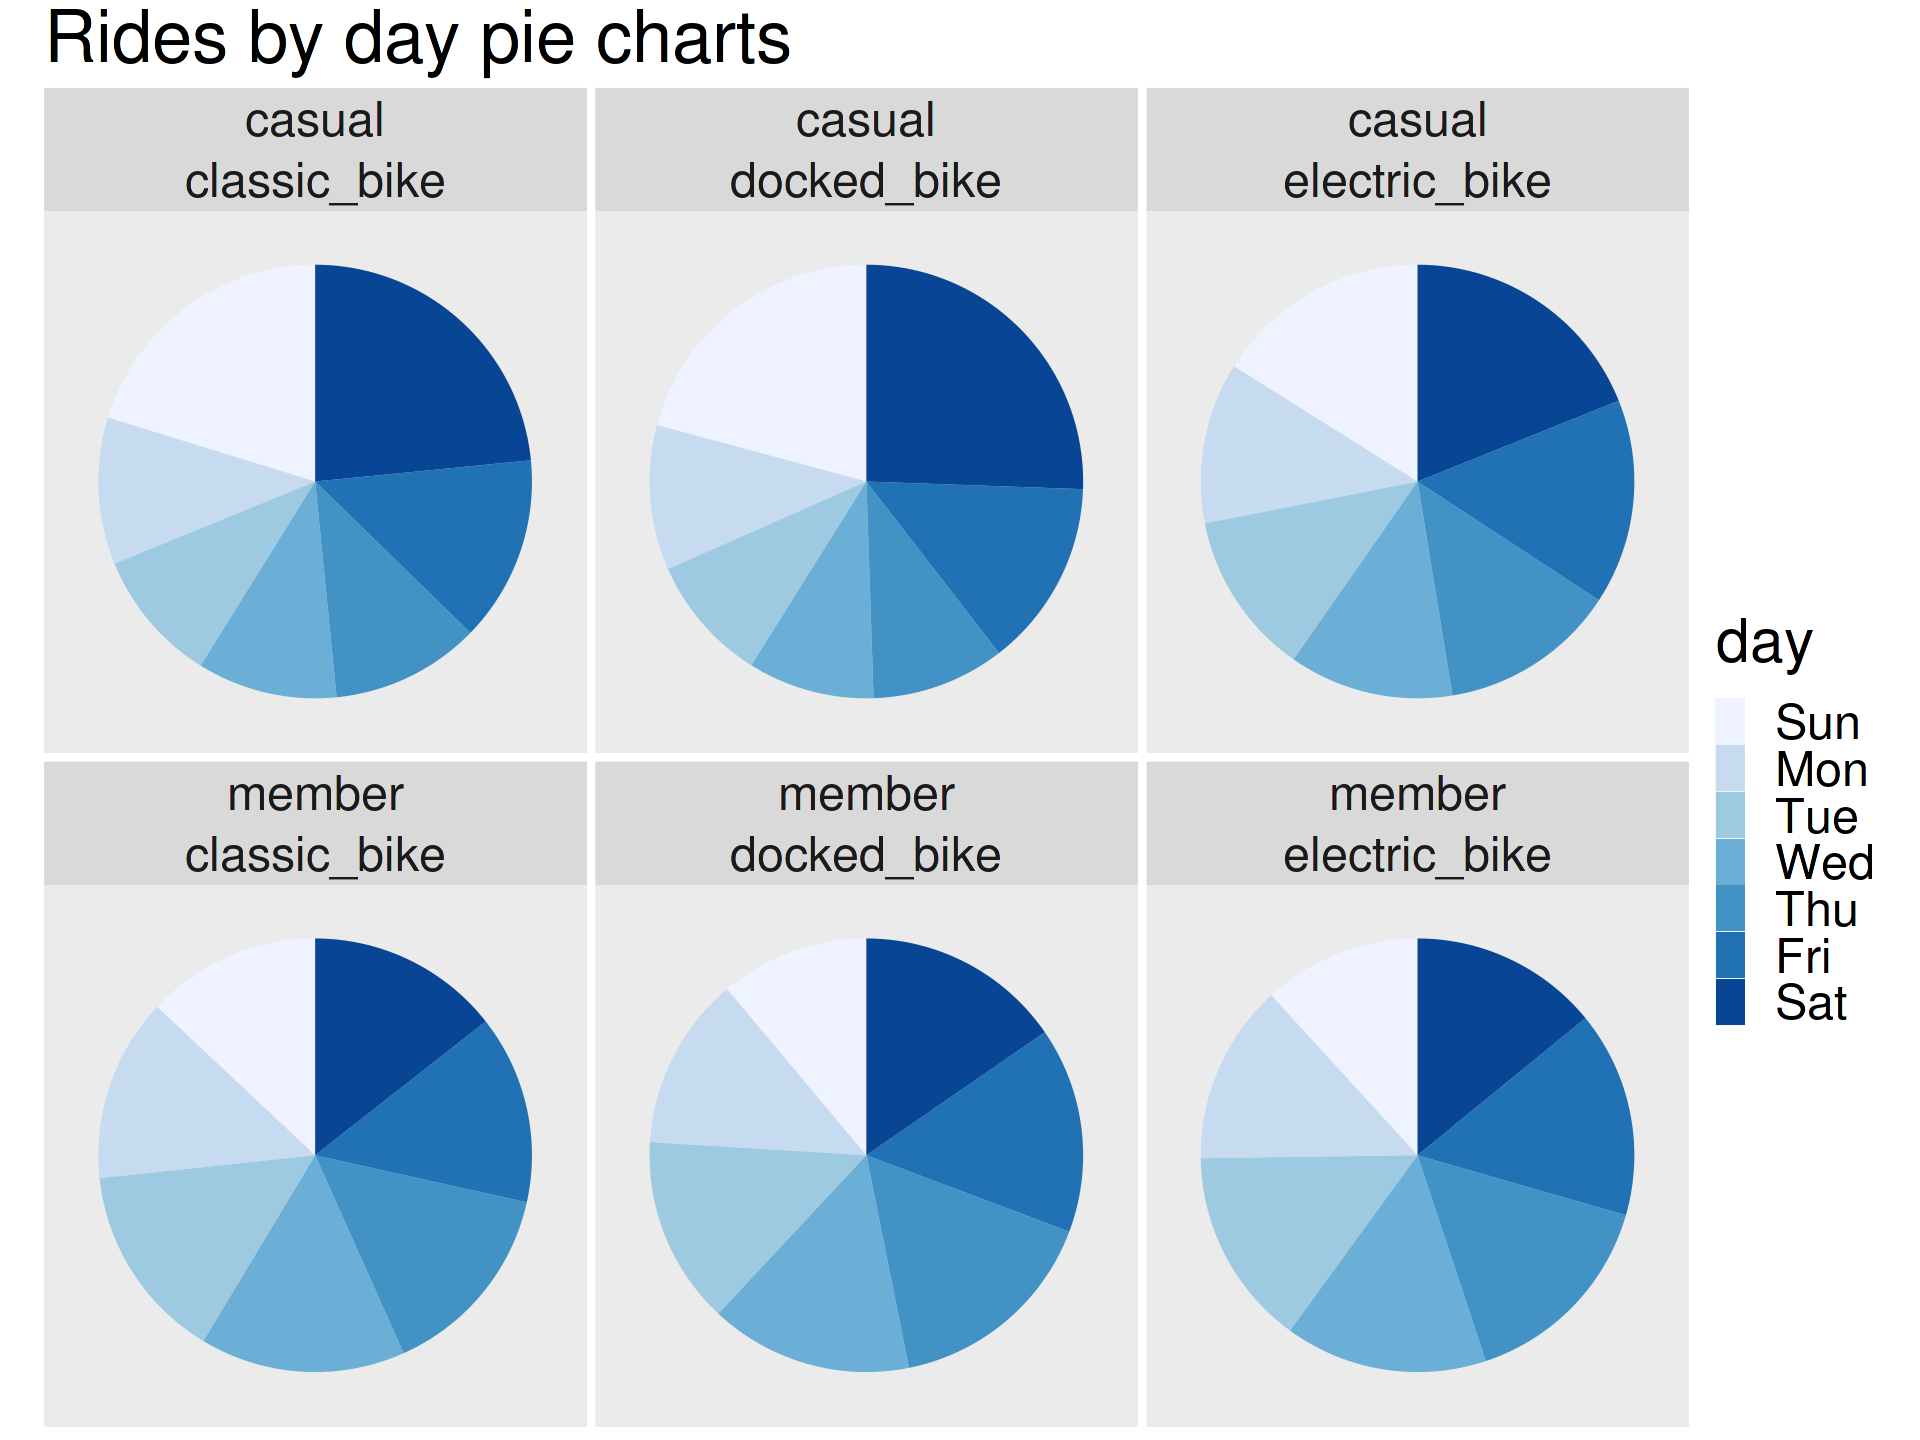

In [5]:
# number of rides by day statistics

rides_by_day<-processed_data  %>% group_by(member_casual,rideable_type) %>% count(day)

rides_by_day_statistics<-rides_by_day %>% pivot_wider(names_from = day, values_from = n)

rides_by_day_statistics<- cbind(rides_by_day_statistics,
                                sat_sun_percentage= c(100*mean(filter(processed_data,member_casual=='casual',rideable_type=="classic_bike")$day=='Sat'|
                                                                 filter(processed_data,member_casual=='casual',rideable_type=="classic_bike")$day=='Sun'),
                                                      100*mean(filter(processed_data,member_casual=='casual',rideable_type=="docked_bike")$day=='Sat'|
                                                                 filter(processed_data,member_casual=='casual',rideable_type=="docked_bike")$day=='Sun'),
                                                      100*mean(filter(processed_data,member_casual=='casual',rideable_type=="electric_bike")$day=='Sat'|
                                                                 filter(processed_data,member_casual=='casual',rideable_type=="electric_bike")$day=='Sun'),
                                                      100*mean(filter(processed_data,member_casual=='member',rideable_type=="classic_bike")$day=='Sat'|
                                                                 filter(processed_data,member_casual=='member',rideable_type=="classic_bike")$day=='Sun'),
                                                      100*mean(filter(processed_data,member_casual=='member',rideable_type=="docked_bike")$day=='Sat'|
                                                                 filter(processed_data,member_casual=='member',rideable_type=="docked_bike")$day=='Sun'),
                                                      100*mean(filter(processed_data,member_casual=='member',rideable_type=="electric_bike")$day=='Sat'|
                                                                 filter(processed_data,member_casual=='member',rideable_type=="electric_bike")$day=='Sun')))

rides_by_day_statistics

# rides by day pie charts 

options(repr.plot.width = 16, repr.plot.height = 12)

ggplot(rides_by_day,
       aes(x = "", y = n, group = day, fill=day)) +
  geom_bar(width = 1, stat = "identity",position = "fill",size = 0.3) +
  coord_polar(theta="y") +
  facet_wrap(member_casual~rideable_type)+
  theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title.y=element_blank(),
        axis.title.x=element_blank(),
        panel.grid  = element_blank())+
  scale_fill_brewer(palette="Blues")+
  labs(title = "Rides by day pie charts")+
  theme(text = element_text(size = 36), element_line(size = 1.6))


The table shows that casual riders Saturday-Sunday percentage are 34.99%, 46.36% and 43.67% for electric, docked and classic bikes respectively, more than that in member riders which are 25.88%, 26.50%, and 27.40%, And The pie charts consolidate how casual riders prefer weekend days, While members make trips in all days evenly.

The next graph shows clearly that the casual riders have more rides at the weekend than members, While the members have more rides on the rest of the weekdays.

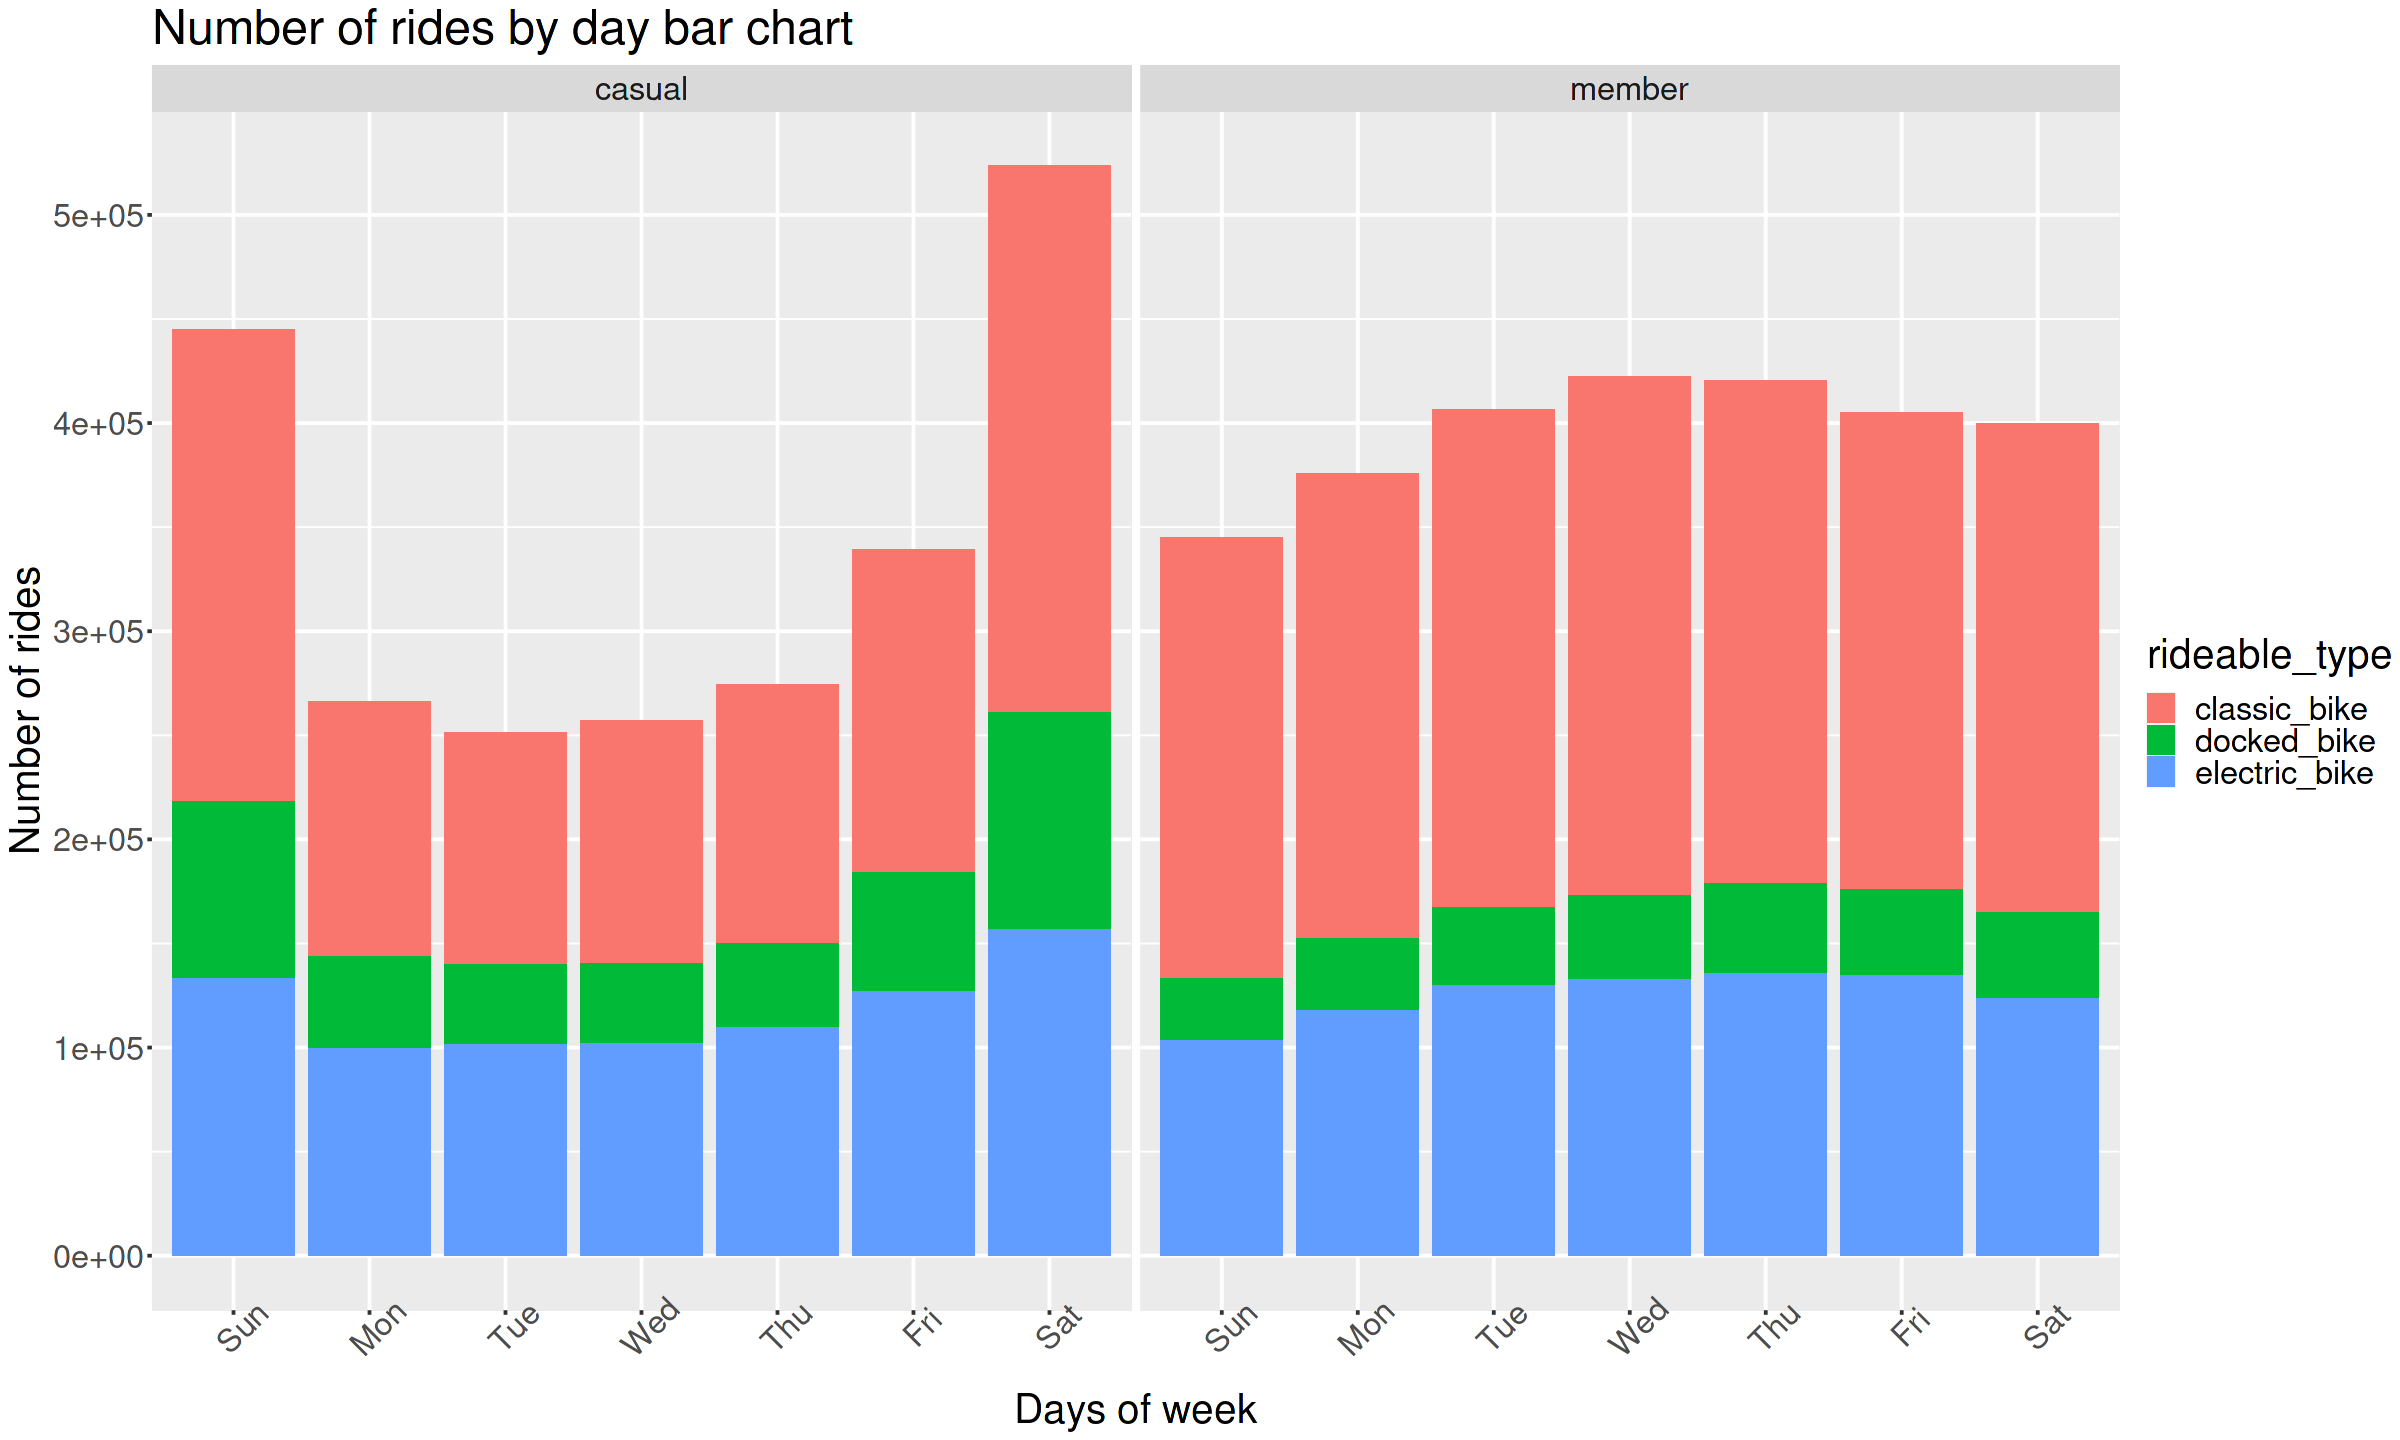

In [6]:
# number of rides by day bar chart

options(repr.plot.width = 20, repr.plot.height = 12)
ggplot(data= processed_data)+
  geom_bar(mapping=aes(x=day,fill=rideable_type))+
  facet_wrap(~member_casual)+
  theme(axis.text.x = element_text(angle=45))+ 
  labs(x ="Days of week", y="Number of rides" , title = "Number of rides by day bar chart")+
  theme(text = element_text(size = 24), element_line(size = 0.8))



The next heat map shows the number of riders in days of the week versus months of the year. Clearly, it shows that the weekend days of the summer months (6,7,8, and 9) have more casual rides than member rides. 

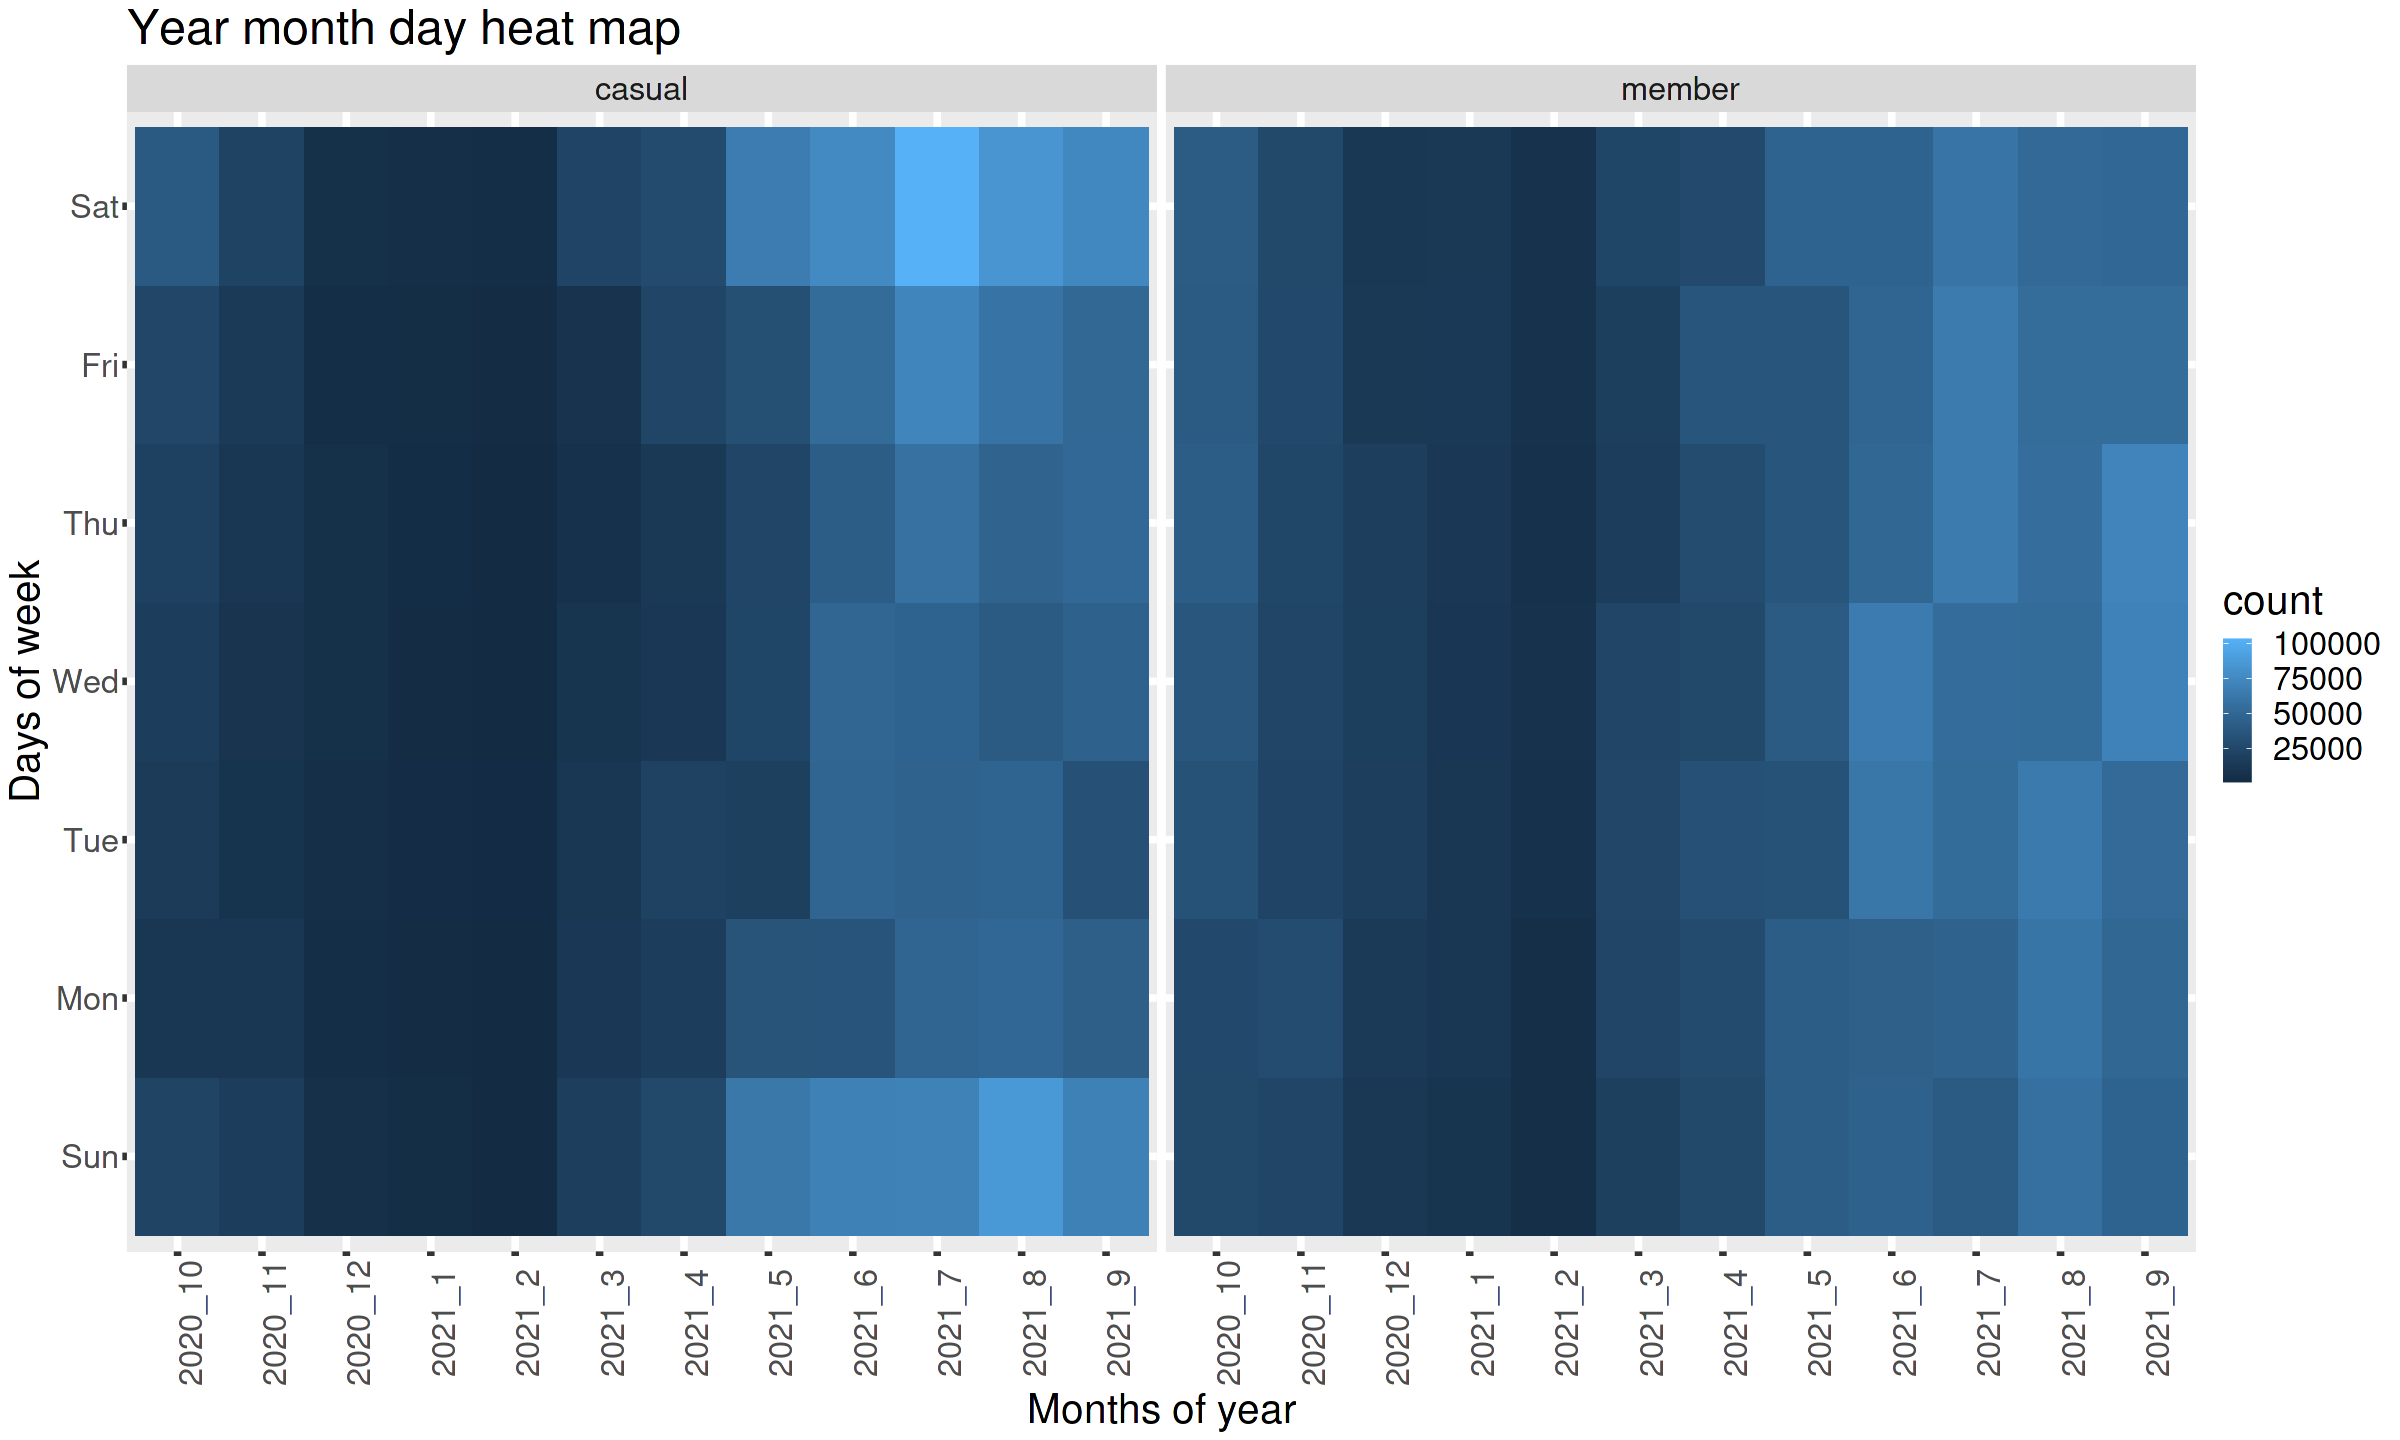

In [7]:
#year_month_day heat map

options(repr.plot.width = 20, repr.plot.height = 12)
ggplot(processed_data, aes(x=year_month, y=day)) + 
  geom_bin2d() +
  theme(axis.text.x = element_text(angle=90))+
  facet_wrap(~member_casual)+ 
  labs(x ="Months of year", y="Days of week" , title = "Year month day heat map")+
  theme(text = element_text(size = 24), element_line(size = 1.6))

Now let's view the average ride length on each day of the week.

member_casual,Sun,Mon,Tue,Wed,Thu,Fri,Sat,average_ride_length
<chr>,<drtn>,<drtn>,<drtn>,<drtn>,<drtn>,<drtn>,<drtn>,<drtn>
casual,2284.4402 secs,1953.2472 secs,1759.7402 secs,1718.2030 secs,1702.9358 secs,1883.5209 secs,2134.7323 secs,1919.5457 secs
member,962.7708 secs,820.6713 secs,800.0397 secs,804.3196 secs,797.8204 secs,841.1131 secs,944.0037 secs,852.9627 secs


Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



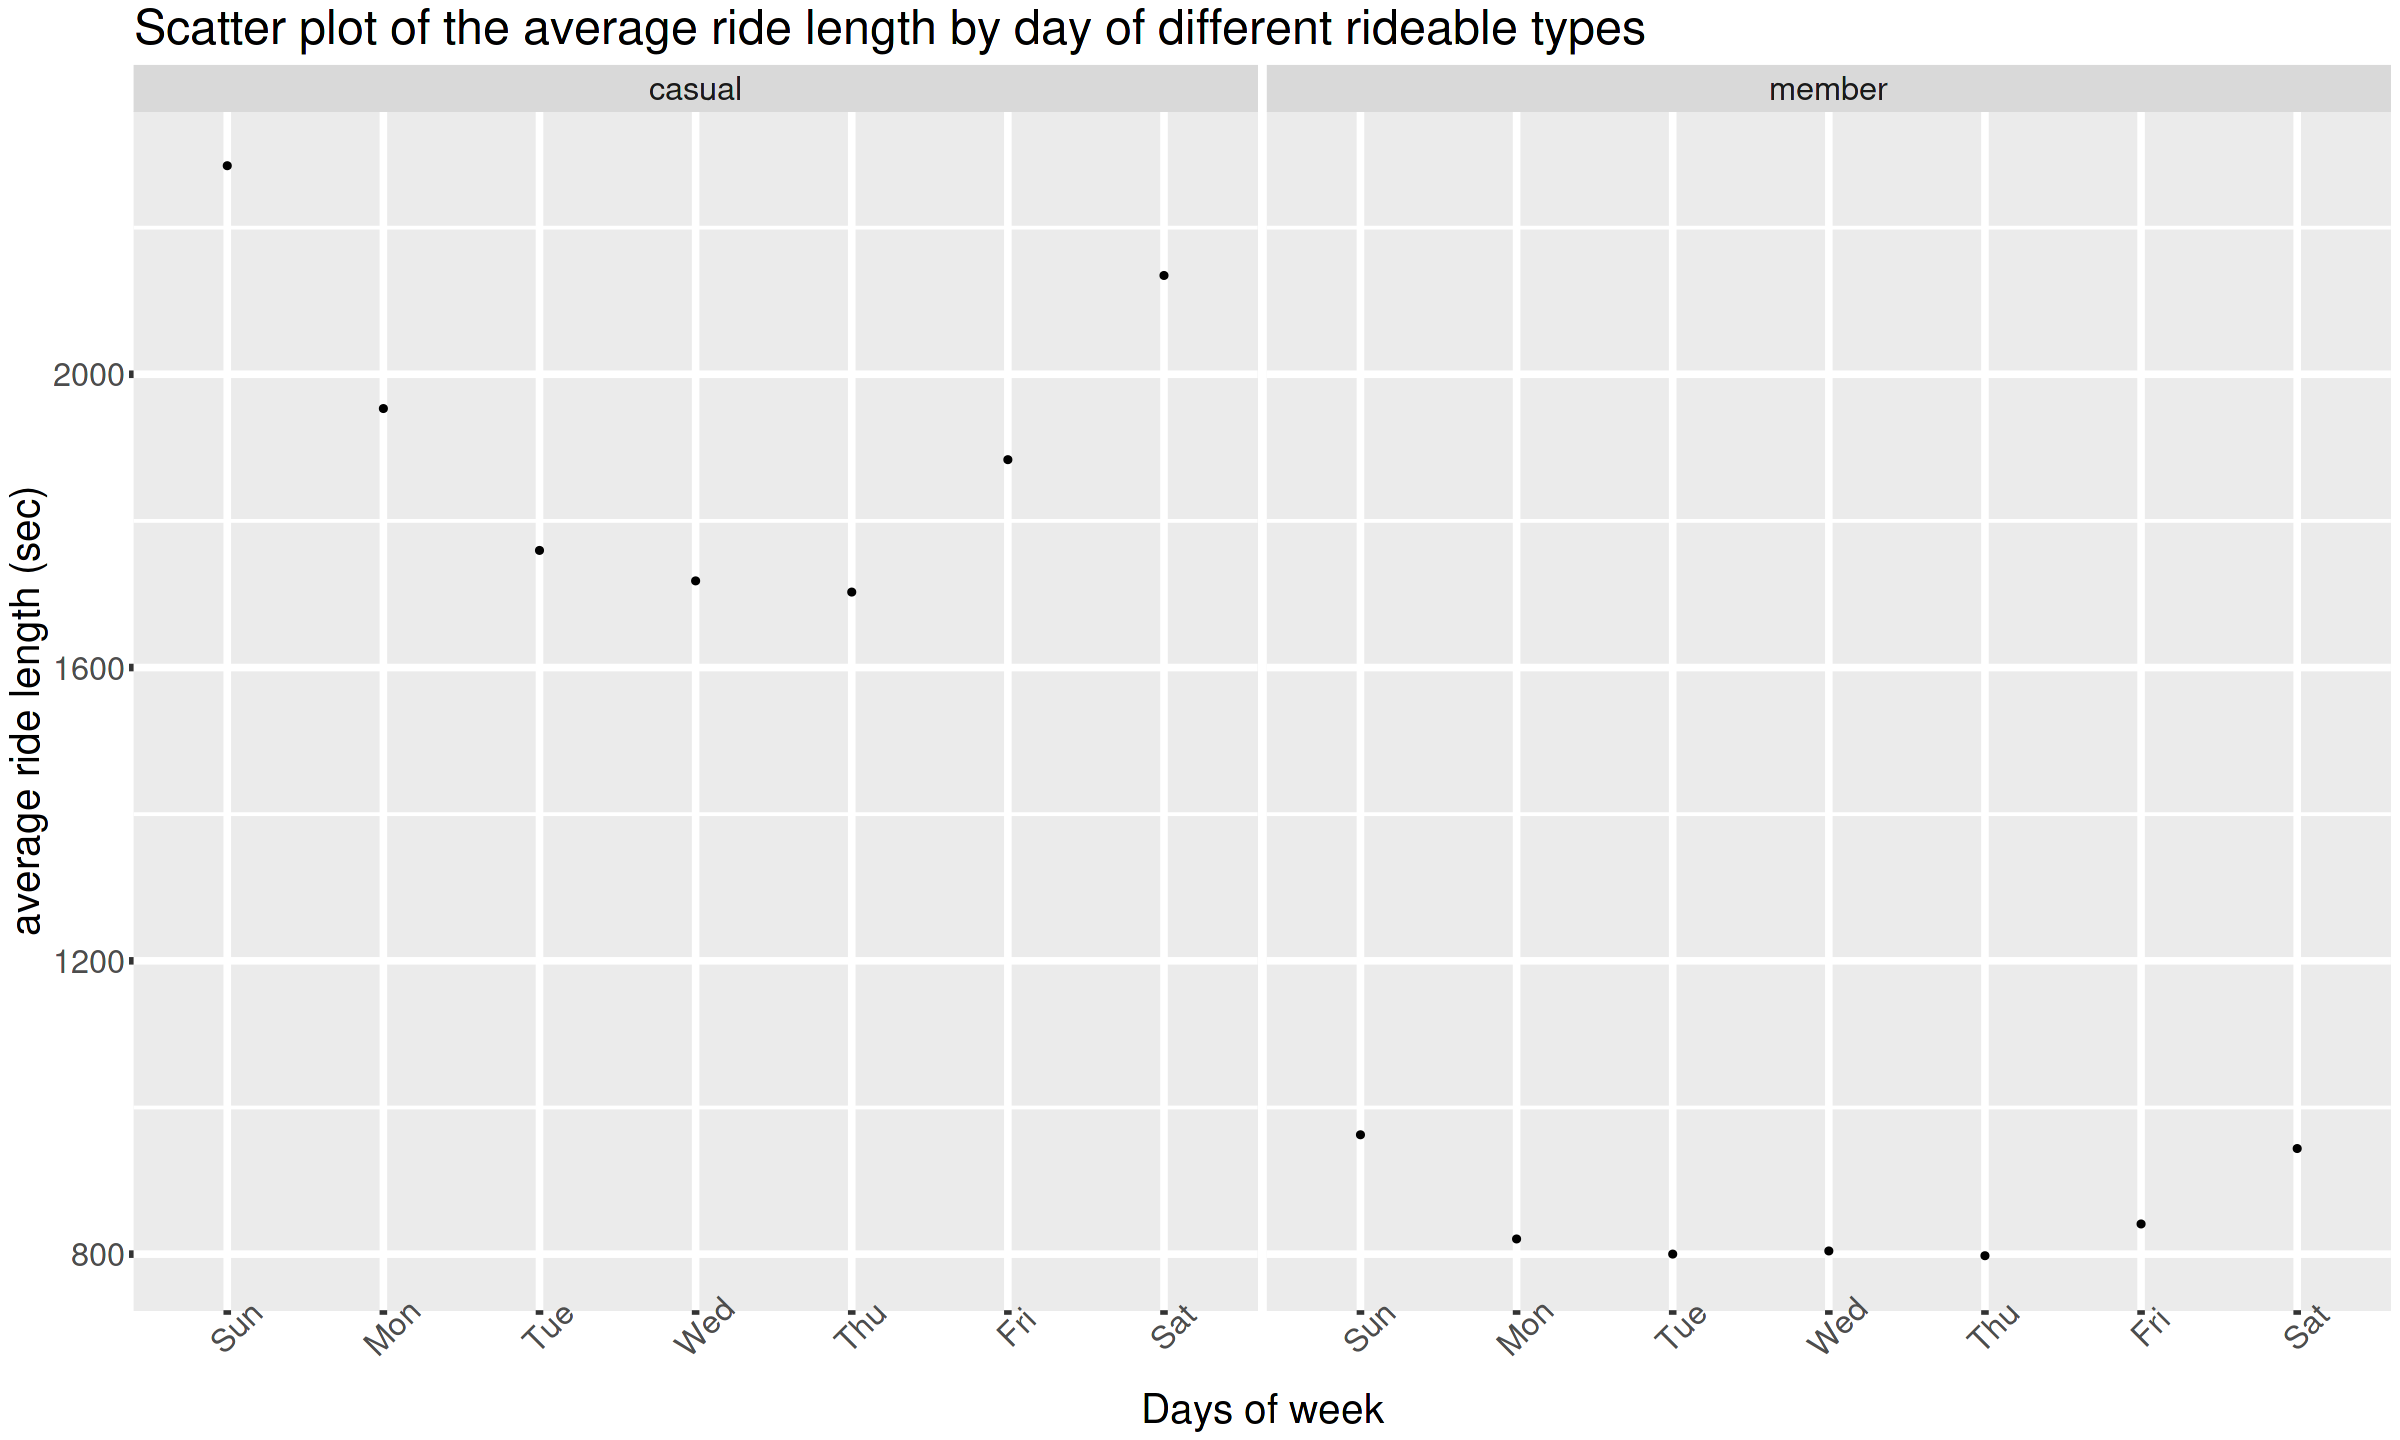

In [8]:
# average ride length for users by day of week

options(dplyr.summarise.inform = FALSE, repr.plot.width = 20, repr.plot.height = 12)

ride_length_by_day <- processed_data %>%
  group_by(member_casual, day) %>%
  summarize(average_ride_length=mean(ride_length))

ride_length_by_day_statistics<- ride_length_by_day %>% pivot_wider(names_from = day, values_from = average_ride_length)

ride_length_by_day_statistics<-
  cbind(ride_length_by_day_statistics,average_ride_length = c(mean(filter(ride_length_by_day,member_casual=='casual')$average_ride_length),
                                                              mean(filter(ride_length_by_day,member_casual=='member')$average_ride_length)))

ride_length_by_day_statistics

# average ride length by day scatter plot

ride_length_by_day %>% 
  ggplot(aes(x=day,y=average_ride_length))+
  geom_point()+
  facet_wrap(~member_casual)+
  theme(axis.text.x = element_text(angle=45))+
  xlab("Days of week")+
  ylab("average ride length (sec)")+ 
  
  labs(title = "Scatter plot of the average ride length by day of different rideable types")+
  theme(text = element_text(size = 24), element_line(size = 1.6))

From the graph and the table, we conclude that casual riders tend to have higher ride length trips than members on all weekdays.

In [9]:
cat("trips with ride length more than 45 minutes from all trips :\n", 
    100*mean(processed_data$ride_length>2700),"%\n")

cat("ride length more than 45 minutes from all casual riders :\n", 
    100*mean(filter(processed_data,member_casual=='casual')$ride_length>2700),"%\n")

A <-
  mean(processed_data$member_casual=='casual')*mean(filter(processed_data,member_casual=='casual')$ride_length>2700)

cat("weekend trips from all casual riders :\n", 
    100*mean(filter(processed_data,member_casual=='casual')$day=='Sat'|filter(processed_data,member_casual=='casual')$day=='Sun'),"%\n")

B <-
  mean(processed_data$member_casual=='casual')*mean(filter(processed_data,member_casual=='casual')$day=='Sat'|filter(processed_data,member_casual=='casual')$day=='Sun')

cat("summer months trips from all casual riders:\n", 
    100*mean(filter(processed_data,member_casual=='casual')$year_month=='2021_6'|
       filter(processed_data,member_casual=='casual')$year_month=='2021_7'|
       filter(processed_data,member_casual=='casual')$year_month=='2021_8'|
       filter(processed_data,member_casual=='casual')$year_month=='2021_9'),"%\n")

C <-
  mean(processed_data$member_casual=='casual')*mean(filter(processed_data,member_casual=='casual')$year_month=='2021_6'|
       filter(processed_data,member_casual=='casual')$year_month=='2021_7'|
       filter(processed_data,member_casual=='casual')$year_month=='2021_8'|
       filter(processed_data,member_casual=='casual')$year_month=='2021_9')

cat("weekends of summer months from all casual riders:\n", 
    100*mean(filter(processed_data,member_casual=='casual',day=='Sat'|day=='Sun')$year_month=='2021_6'|
       filter(processed_data,member_casual=='casual',day=='Sat'|day=='Sun')$year_month=='2021_7'|
       filter(processed_data,member_casual=='casual',day=='Sat'|day=='Sun')$year_month=='2021_8'|
       filter(processed_data,member_casual=='casual',day=='Sat'|day=='Sun')$year_month=='2021_9'),"%\n")

BnC <-
  mean(processed_data$member_casual=='casual')*
  mean(filter(processed_data,member_casual=='casual')$day=='Sat'|filter(processed_data,member_casual=='casual')$day=='Sun')*
  mean(filter(processed_data,member_casual=='casual',day=='Sat'|day=='Sun')$year_month=='2021_6'|
       filter(processed_data,member_casual=='casual',day=='Sat'|day=='Sun')$year_month=='2021_7'|
       filter(processed_data,member_casual=='casual',day=='Sat'|day=='Sun')$year_month=='2021_8'|
       filter(processed_data,member_casual=='casual',day=='Sat'|day=='Sun')$year_month=='2021_9')

cat("weekends with ride length more than 45 minutes from all casual riders :\n", 
    100*mean(filter(processed_data,member_casual=='casual',day=='Sat'|day=='Sun')$ride_length>2700),"%\n")


AnB <-
  mean(processed_data$member_casual=='casual')*
  mean(filter(processed_data,member_casual=='casual')$day=='Sat'|filter(processed_data,member_casual=='casual')$day=='Sun')*
  mean(filter(processed_data,member_casual=='casual',day=='Sat'|day=='Sun')$ride_length>2700)


cat("summer months trips with ride length more than 45 minutes from all casual riders :\n", 
    100*mean(filter(processed_data,member_casual=='casual',year_month=='2021_6'|year_month=='2021_7'|
            year_month=='2021_8'|year_month=='2021_9')$ride_length>2700),"%\n")

AnC <-
  mean(processed_data$member_casual=='casual')*
  mean(filter(processed_data,member_casual=='casual')$year_month=='2021_6'|
       filter(processed_data,member_casual=='casual')$year_month=='2021_7'|
       filter(processed_data,member_casual=='casual')$year_month=='2021_8'|
       filter(processed_data,member_casual=='casual')$year_month=='2021_9')*
  mean(filter(processed_data,member_casual=='casual',year_month=='2021_6'|year_month=='2021_7'|
            year_month=='2021_8'|year_month=='2021_9')$ride_length>2700)
  

cat("weekends of summer months with ride length more than 45 minutes from all casual riders :\n", 
    100*mean(filter(processed_data,member_casual=='casual',year_month=='2021_6'|year_month=='2021_7'|
              year_month=='2021_8'|year_month=='2021_9',day=='Sat'|day=='Sun')$ride_length>2700),"%\n")

AnBnC <-
  mean(processed_data$member_casual=='casual')*
  mean(filter(processed_data,member_casual=='casual')$day=='Sat'|filter(processed_data,member_casual=='casual')$day=='Sun')*
  mean(filter(processed_data,member_casual=='casual',day=='Sat'|day=='Sun')$year_month=='2021_6'|
       filter(processed_data,member_casual=='casual',day=='Sat'|day=='Sun')$year_month=='2021_7'|
       filter(processed_data,member_casual=='casual',day=='Sat'|day=='Sun')$year_month=='2021_8'|
       filter(processed_data,member_casual=='casual',day=='Sat'|day=='Sun')$year_month=='2021_9')*
  mean(filter(processed_data,member_casual=='casual',year_month=='2021_6'|year_month=='2021_7'|
              year_month=='2021_8'|year_month=='2021_9',day=='Sat'|day=='Sun')$ride_length>2700)
  
cat("union of casual riders at weekends and casual riders at summer months and casual riders with ride length more than 45 minutes :\n", 
    100*(A+B+C-AnB-AnC-BnC+AnBnC),"%\n")

trips with ride length more than 45 minutes from all trips :
 7.827298 %
ride length more than 45 minutes from all casual riders :
 14.68628 %
weekend trips from all casual riders :
 41.08698 %
summer months trips from all casual riders:
 67.41294 %
weekends of summer months from all casual riders:
 65.10611 %
weekends with ride length more than 45 minutes from all casual riders :
 17.65623 %
summer months trips with ride length more than 45 minutes from all casual riders :
 13.74191 %
weekends of summer months with ride length more than 45 minutes from all casual riders :
 16.19442 %
union of casual riders at weekends and casual riders at summer months and casual riders with ride length more than 45 minutes :
 38.69429 %


**So to conclude**:

* The casual riders have a higher number of rides on the weekend days (Saturday and Sunday) than members, While the member riders have a higher number of rides on the other weekdays. 56.53% of the weekend trips are casual riders.

* The casual riders have higher average ride length trips than members on all of the weekdays, And 86.17% of the trips with ride length higher than 45 minutes are casual riders.

* 51.06% of the trips of summer months (6,7,8 and 9) are casual riders, And also summer months (6,7,8 and 9) constitute 30.96% of casual trips.

## Recommendations

Based on the conclusion of how casual riders differs from members riders, The marketing strategies aimed at converting casual riders into annual members will be based on three membership offerings with competitive incentives:

* Casual weekend riders, This will allure 41.09% of casual riders to be converted into annual members.

* Casual summer months riders, Targeting 67.41% of casual riders to convert them into annual members.

* Casual riders with ride length more than 45 minutes, Attracting 14.69% of casual riders to become annual members.

Aiming at weekend casual riders, summer months casual riders, and casual riders with ride length more than 45 minutes, 84.25% of casual trips will be targeted which is equivalent to 1,985,984 trips.


